In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn import preprocessing

import sklearn as sk

In [3]:
liver=pd.read_csv("indian_liver_patient_dataset.csv")

## Data wrangling

In [4]:
le=sk.preprocessing.LabelEncoder()
a=pd.DataFrame(le.fit_transform(liver["gender"]))
liver=pd.concat((liver,a), axis=1)
liver.drop(["gender"],axis=1, inplace=True)
liver=liver.rename(columns = {0: "gender"})

## EDA /Data Visualization

In [108]:
liver.head()

,age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,class,gender
0,65,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0,0
1,62,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0,1
2,62,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0,1
3,58,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0,1
4,72,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0,1


In [5]:
liver=liver.rename(columns = {"TB": "Total_Bilirubin", 
                                  "DB":"Direct_Bilirubin", 
                                  "alkphos": "Alkaline_Phosphotase",
                       "sgpt":"Alamine_Aminotransferase",
                       "sgot":"Aspartate_Aminotransferase",
                       "TP":"Total_Protiens",
                       "ALB":"Albumin",
                       "A_G":"Albumin_and_Globulin_Ratio",
                       "class":"Dataset"}) 

In [6]:
liver=liver.rename(columns = {"Dataset":"class"})

In [7]:
liver.describe()
#We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values indicating 4 missing values.
#Gender has only 2 values - Male/Female

,age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,class,gender
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.00000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,-685.16578,1.286449,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,8261.85600,0.452490,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,-100000.00000,1.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.70000,1.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.92000,1.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.10000,2.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.80000,2.000000,1.000000


In [110]:
liver.info()
#Describe gives statistical information about NUMERICAL columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null float64
Alamine_Aminotransferase      583 non-null float64
Aspartate_Aminotransferase    583 non-null float64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
class                         583 non-null float64
gender                        583 non-null int32
dtypes: float64(9), int32(1), int64(1)
memory usage: 47.9 KB


Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


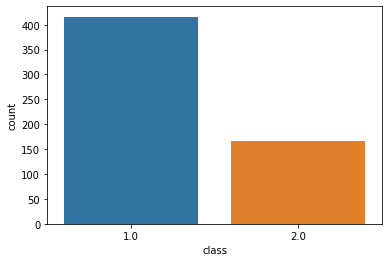

In [114]:
sns.countplot(data=liver, x = 'class', label='Count')

yes_disease, no_disease = liver['class'].value_counts()
print('Number of patients diagnosed with liver disease: ',yes_disease)
print('Number of patients not diagnosed with liver disease: ',no_disease)

Number of patients that are male:  142
Number of patients that are female:  441


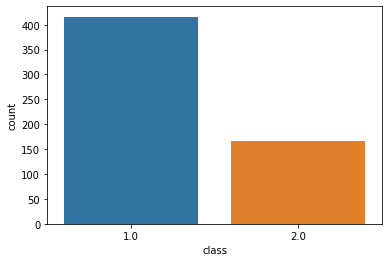

In [115]:
sns.countplot(data=liver, x = 'class', label='Count')

print('Number of patients that are male: ',liver['gender'].value_counts()[0])
print('Number of patients that are female: ',liver['gender'].value_counts()[1])

C:\Users\Barath\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: Invalid RGBA argument: masked

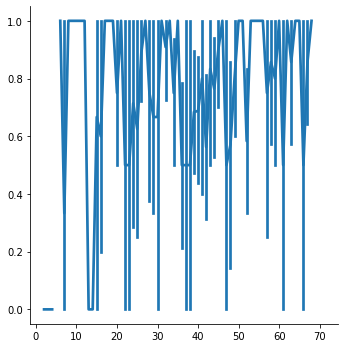

In [8]:
sns.factorplot(x="age", y="gender",hue=pd.to_numeric(liver["class"]), data=liver)
#Age seems to be a factor for liver disease for both males and females

,class,gender,age
2,2.0,0,50
3,2.0,1,117
0,1.0,0,92
1,1.0,1,324


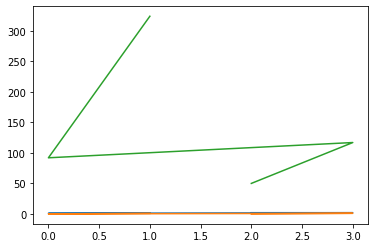

In [11]:
plt.plot(liver[['gender', 'class','age']].groupby(['class','gender'], as_index=False).count().sort_values(by='class', ascending=False))
liver[['gender', 'class','age']].groupby(['class','gender'], as_index=False).count().sort_values(by='class', ascending=False)

,class,gender,age
2,2.0,0,42.740000
3,2.0,1,40.598291
0,1.0,0,43.347826
1,1.0,1,46.950617


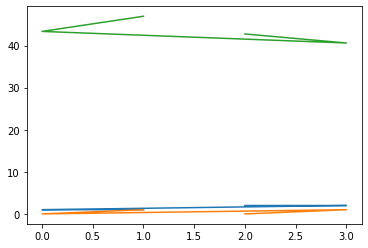

In [13]:
plt.plot(liver[['gender', 'class','age']].groupby(['class','gender'], as_index=False).mean().sort_values(by='class', ascending=False))
liver[['gender', 'class','age']].groupby(['class','gender'], as_index=False).mean().sort_values(by='class', ascending=False)

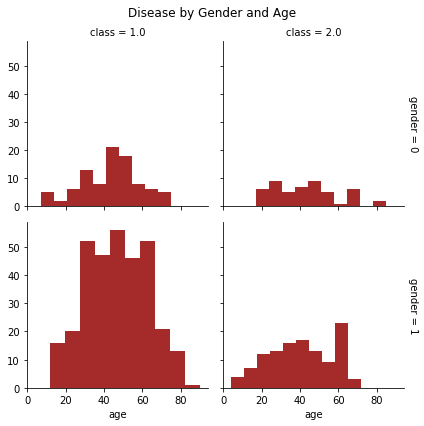

In [128]:
plot = sns.FacetGrid(liver, col="class", row="gender", margin_titles=True)
plot.map(plt.hist, "age", color="brown")
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Disease by Gender and Age');

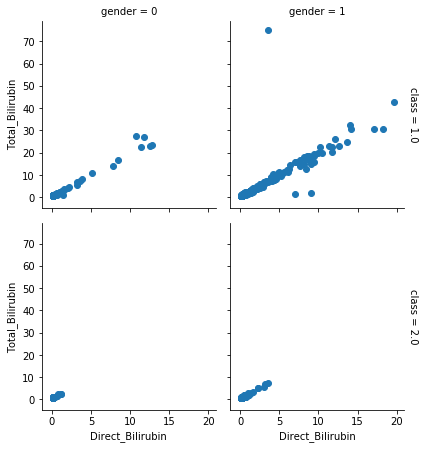

In [129]:
plot = sns.FacetGrid(liver, col="gender", row="class", margin_titles=True)
plot.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin")
plt.subplots_adjust(top=1.0)

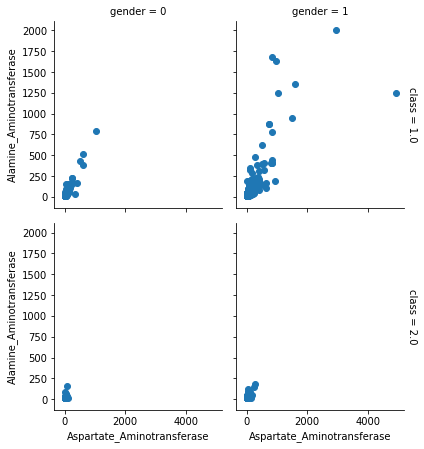

In [130]:
plot = sns.FacetGrid(liver, col="gender", row="class", margin_titles=True)
plot.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase")
plt.subplots_adjust(top=1.0)

#There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. 
#We have the possibility of removing one of this feature.

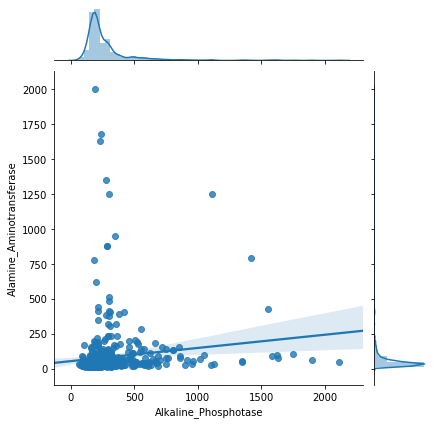

In [131]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver, kind="reg")

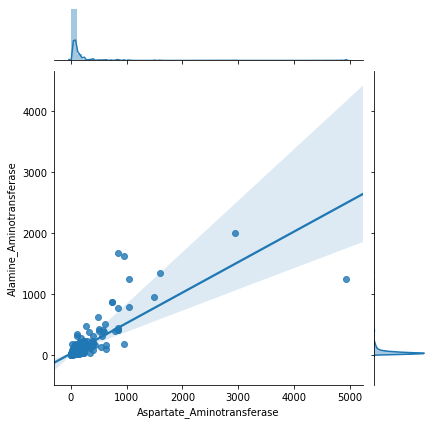

In [132]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver, kind="reg")

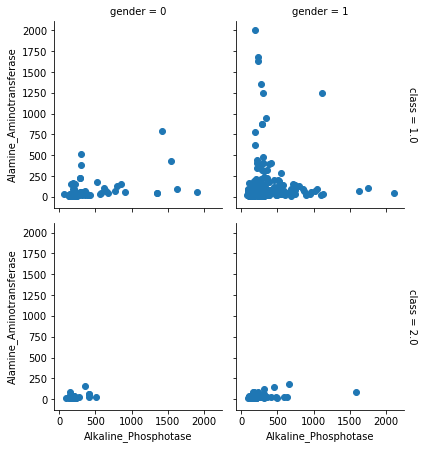

In [134]:
plot = sns.FacetGrid(liver, col="gender", row="class", margin_titles=True)
plot.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase")
plt.subplots_adjust(top=1.0)

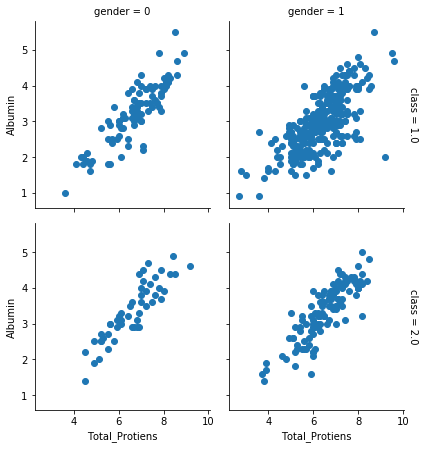

In [137]:
plot = sns.FacetGrid(liver, col="gender", row="class", margin_titles=True)
plot.map(plt.scatter,"Total_Protiens", "Albumin")
plt.subplots_adjust(top=1.0)

#There is linear relationship between Total_Protiens and Albumin and the gender. 


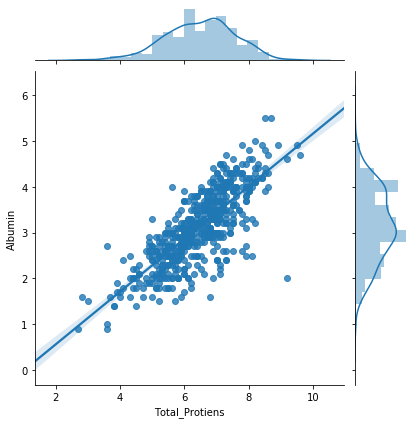

In [138]:
sns.jointplot("Total_Protiens", "Albumin", data=liver, kind="reg")

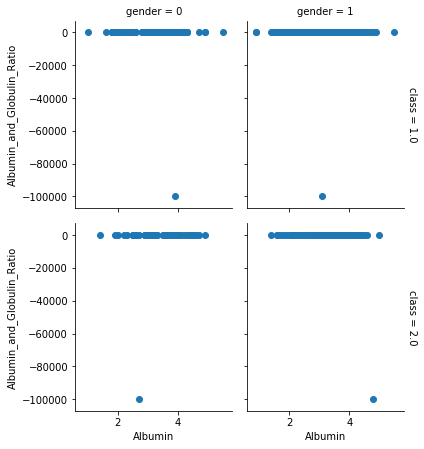

In [139]:
plot = sns.FacetGrid(liver, col="gender", row="class", margin_titles=True)
plot.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio")
plt.subplots_adjust(top=1.0)

Text(0.5, 1, 'Correlation among variables')

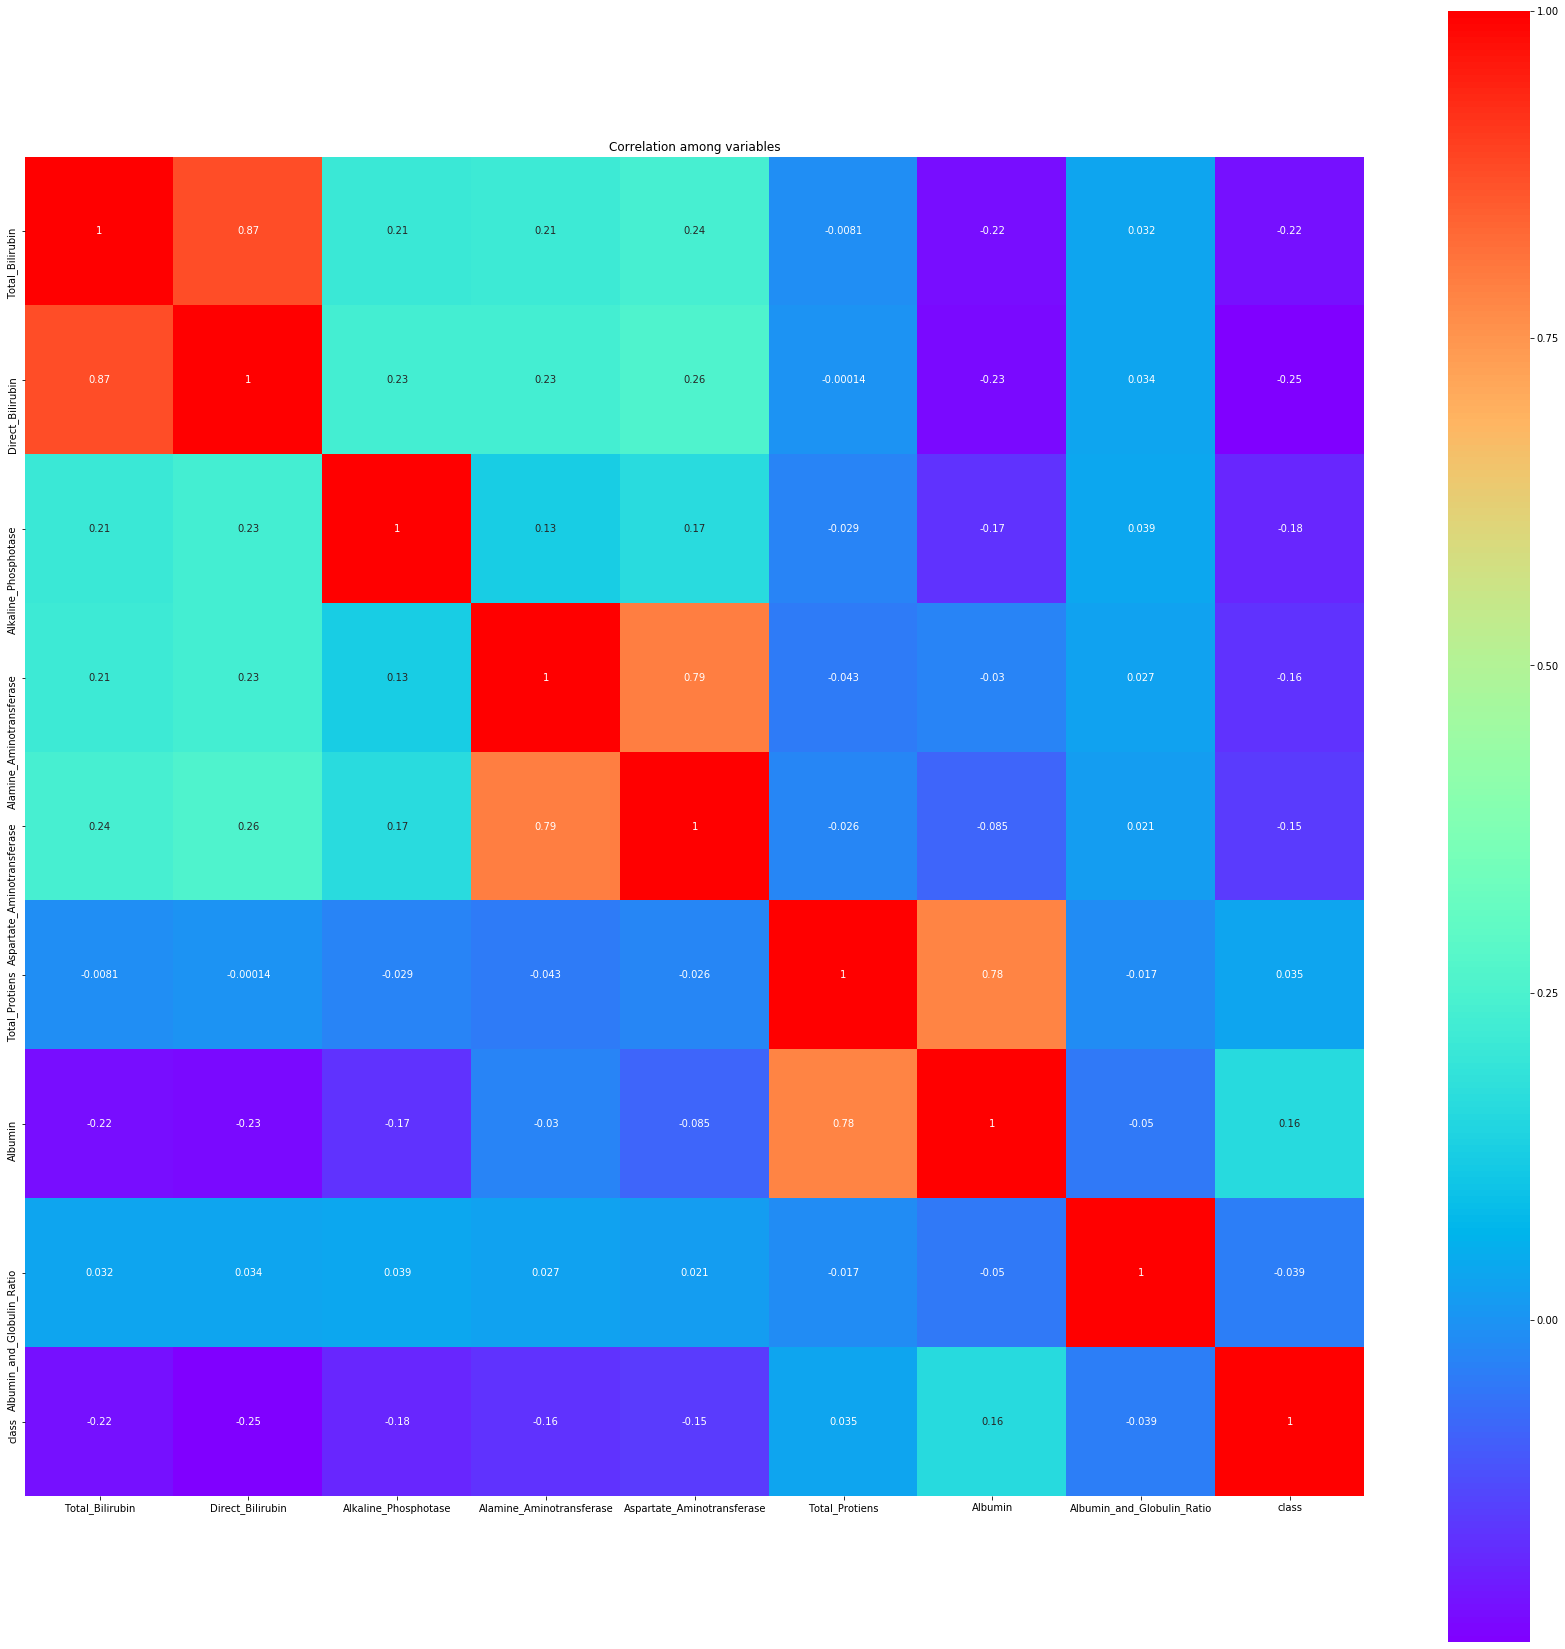

In [141]:
liver2=liver.drop(["gender","age"],axis=1)
plt.figure(figsize=(30, 30))
sns.heatmap(liver2.corr(), cbar = True,  square = True, annot=True, cmap= 'rainbow')
plt.title('Correlation among variables')

From the above jointplots and scatterplots, we find direct relationship between the following features:
Direct_Bilirubin & Total_Bilirubin
Aspartate_Aminotransferase & Alamine_Aminotransferase
Total_Protiens & Albumin
Albumin_and_Globulin_Ratio & Albumin

Hence, we can very well find that we can omit one of the features.

## Supervised - Classification

In [15]:
y=liver["class"]
x=liver.drop(["class"],axis=1)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [48]:
# 1. Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
logistic=lr.score(x_test,pred)
print("score",logistic)
print("Accuray ", metrics.accuracy_score(y_test,pred))
print("Confusion matrix\n",confusion_matrix(y_test,pred))

score 1.0
Accuray  0.7428571428571429
Confusion matrix
 [[120   9]
 [ 36  10]]


In [14]:
#Standard Scalar
#sc = preprocessing.StandardScaler()
#x_train=sc.fit_transform(x_train)
#x_test=sc.transform(x_test)

In [49]:
# 2 #Fitting decision tree classification to the training set
from sklearn.tree import DecisionTreeClassifier
classifier3=DecisionTreeClassifier(criterion= "entropy")
classifier3.fit(x_train,y_train)
y2_pred=classifier3.predict(x_test)
entropy_tree=classifier3.score(x_test,y2_pred)
print("score",entropy_tree)
print("Accuray ", metrics.accuracy_score(y_test,y2_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y2_pred))

score 1.0
Accuray  0.6571428571428571
Confusion matrix
 [[98 31]
 [29 17]]


In [50]:
# 3. Decision tree using gini
from sklearn import tree
classifier5=DecisionTreeClassifier(criterion= "gini")
classifier5.fit(x_train,y_train)
y3_pred=classifier5.predict(x_test)
gini=classifier5.score(x_test,y3_pred)
print("score",gini)
print("Accuray ", metrics.accuracy_score(y_test,y3_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y3_pred))

score 1.0
Accuray  0.6571428571428571
Confusion matrix
 [[97 32]
 [28 18]]


In [17]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import os
os.environ["PATH"] += os.pathsep + "C:/Users/Barath/Desktop/Python/W9 - Supervised learning - classification/data/release/bin"

C:\Users\Barath\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


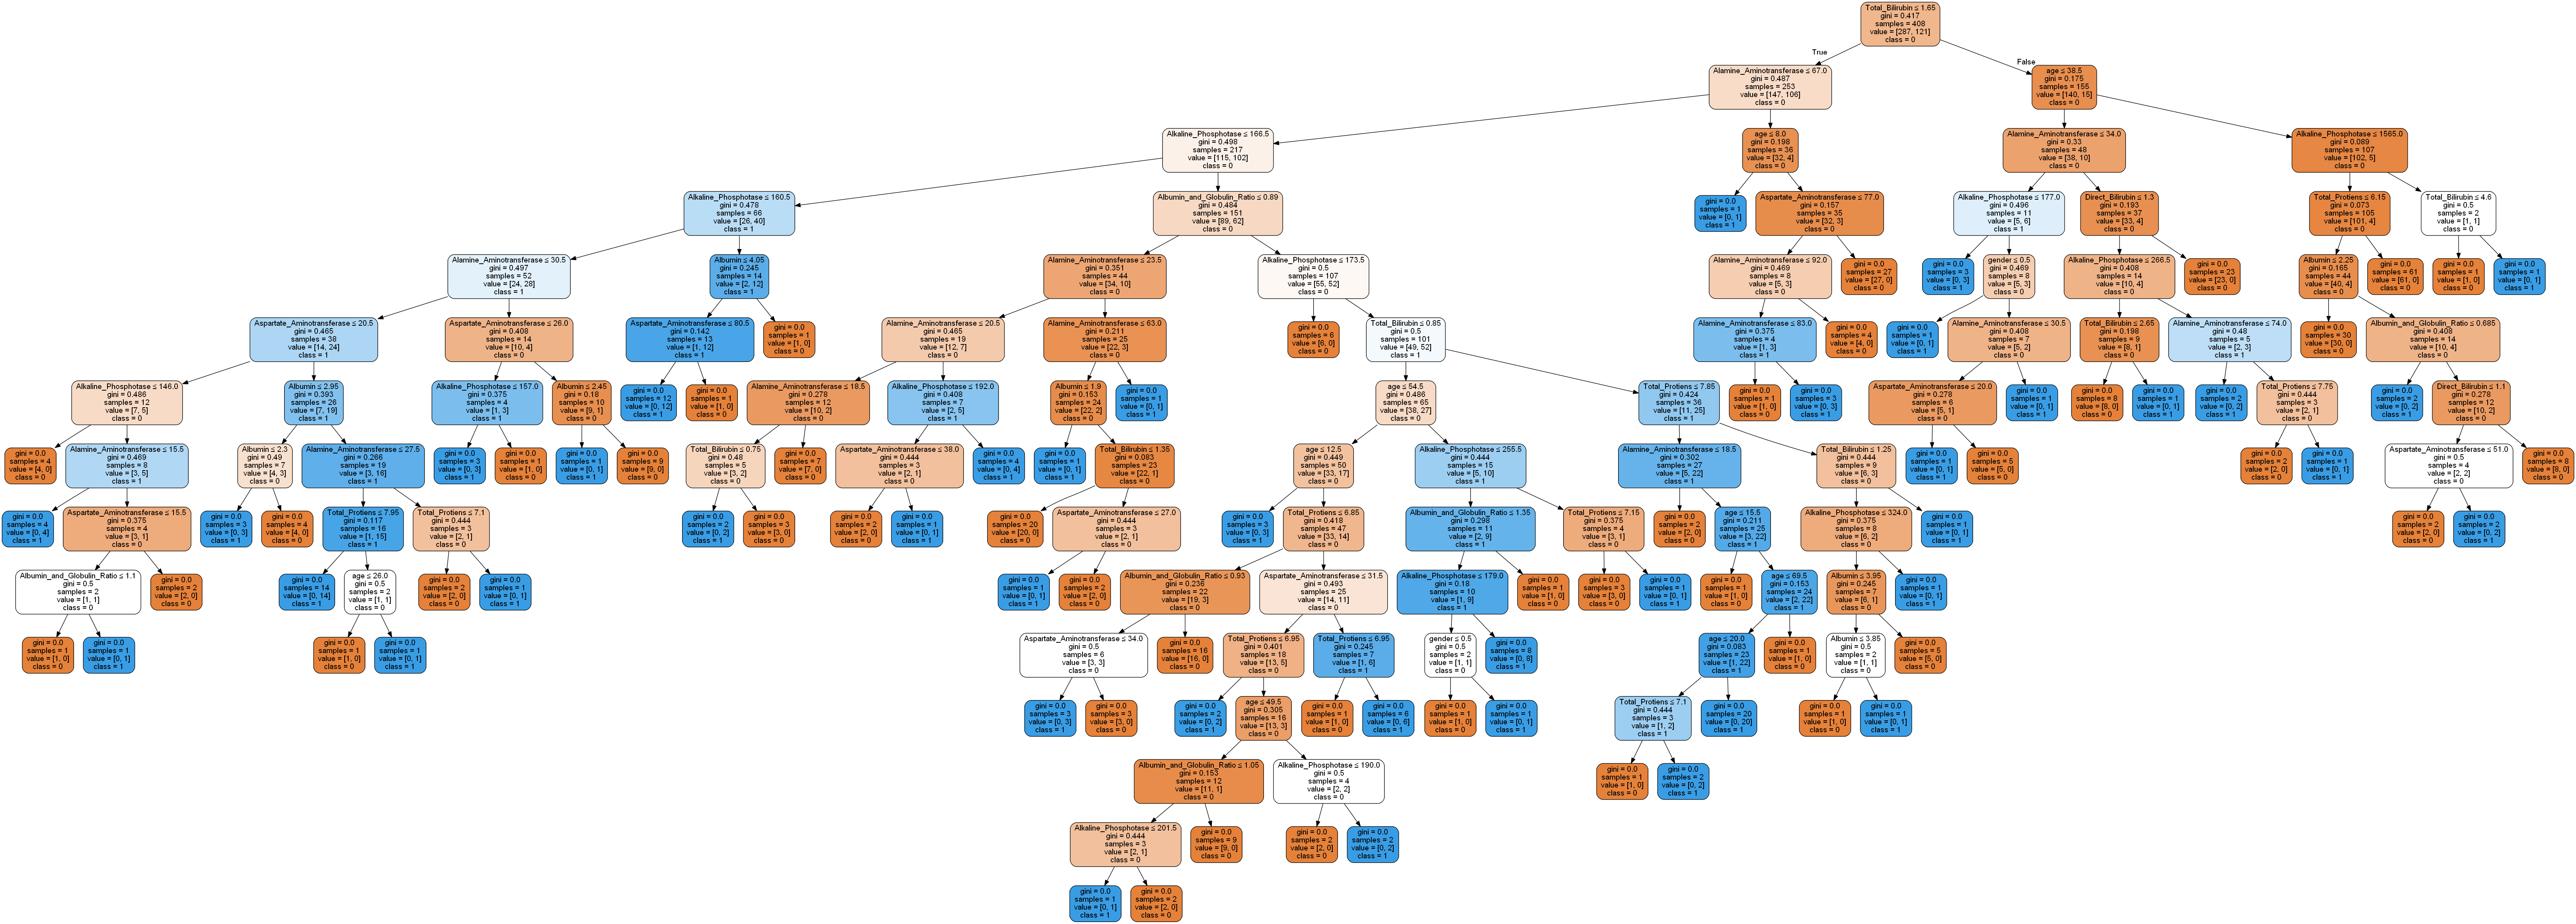

In [18]:
dot_data=StringIO()
export_graphviz(classifier5,out_file=dot_data,
             filled=True,rounded=True,
             special_characters=True,
             feature_names=x.columns,
             class_names=['0','1',"2","3","4","5","6","7","8","9","10","11"])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Indian_Liver_Patient.png')
Image(graph.create_png())

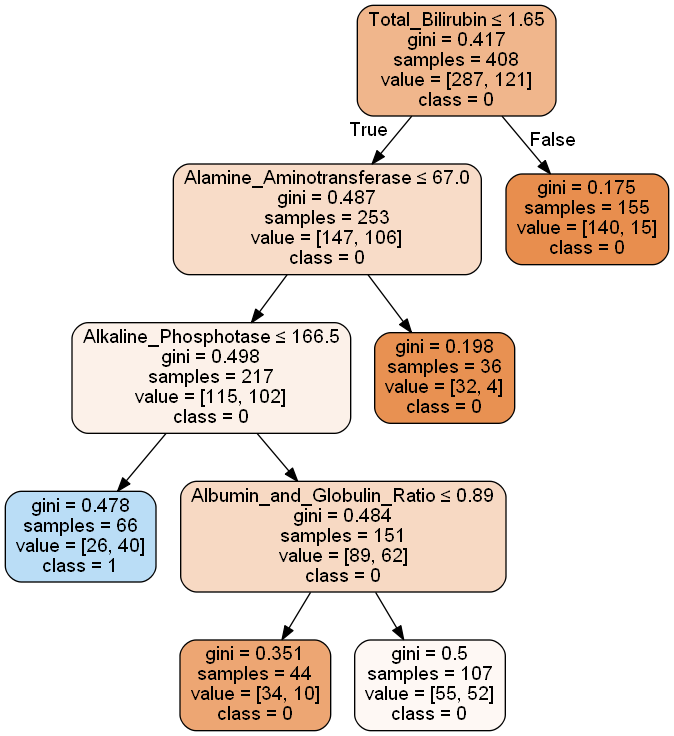

In [19]:
#After pruning
clf = DecisionTreeClassifier(class_weight = None, criterion = 'gini', max_depth=5, max_features=None, max_leaf_nodes=5,
                            min_samples_leaf=3, min_samples_split=2,min_weight_fraction_leaf=0.0,
                            presort=False, random_state=None, splitter = 'best')
clf = clf.fit(x_train, y_train)
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,
             filled=True,rounded=True,
             special_characters=True,feature_names=x.columns,
             class_names=["0","1","2","3","4","5","6","7","8","9","10","11"])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Indian_Liver_Patient.png')
Image(graph.create_png())

In [51]:
#4 Random Forest

from sklearn.ensemble import RandomForestClassifier
#create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(x_train,y_train)
#predict the model
y4_pred=clf2.predict(x_test)
clf2.fit(x_train,y_train)
clf2.predict(x_test)
print("score",clf2.score(x_test,y4_pred))
print("Accuray ", metrics.accuracy_score(y_test,y4_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y4_pred))

score 0.9085714285714286
Accuray  0.7314285714285714
Confusion matrix
 [[110  19]
 [ 28  18]]


In [52]:
#5 Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

rfc= RandomForestClassifier(n_jobs=-1,max_features= "sqrt", n_estimators=50, oob_score= True)

param_grid={ "n_estimators":[200,700],
           "max_features":["auto","sqrt","log2"]}

CV_rfc= GridSearchCV(estimator=rfc,param_grid=param_grid, cv=5)
CV_rfc.fit(x_train,y_train)

y5_pred=CV_rfc.predict(x_test)
print("score",CV_rfc.score(x_test,y5_pred))
print("Accuray ", metrics.accuracy_score(y_test,y5_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y5_pred))

score 1.0
Accuray  0.7257142857142858
Confusion matrix
 [[107  22]
 [ 26  20]]


In [53]:
#6 KNeighbors

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
a=scalar.fit(x_train)

x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier

classifier4=KNeighborsClassifier(n_neighbors=5)
classifier4.fit(x_train,y_train)
y6_pred=classifier4.predict(x_test)
print("score",classifier4.score(x_test,y6_pred))
print("Accuray ", metrics.accuracy_score(y_test,y6_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y6_pred))

score 1.0
Accuray  0.6857142857142857
Confusion matrix
 [[102  27]
 [ 28  18]]


In [56]:
#7 Naive Bayes

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
pred7=model.predict(x_test)
model.score(x_test,pred7)
print("score",model.score(x_test,y7_pred))
print("Accuray ", metrics.accuracy_score(y_test,y7_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y7_pred))

score 0.5257142857142857
Accuray  0.6857142857142857
Confusion matrix
 [[102  27]
 [ 28  18]]


[0.6464891773560143, 0.6964117628964285, 0.6567463369118295, 0.7030724824920278, 0.6430409014939452, 0.6841915572097983, 0.6617423892870692, 0.6964127882535093, 0.6772950054856604, 0.706701221200283, 0.6823505285715751, 0.696235401478565, 0.6926389615183488, 0.6980784808309494, 0.6703974284044418, 0.6877900478841756, 0.663676212741087, 0.6896633752704379, 0.6637649061285591, 0.6999800055369282, 0.682677104801747, 0.691329067847878, 0.6827365755124222, 0.698168199575502, 0.6895746818829658, 0.7099721102874076, 0.6998923375065367, 0.7049176125585734, 0.6912706224942836, 0.6997441734083895]


Text(0, 0.5, 'Cross validataed accuracy')

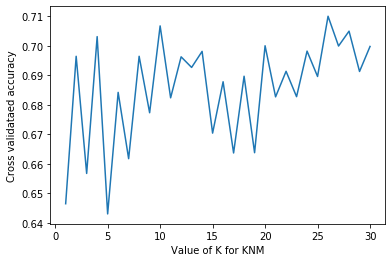

In [23]:
# cross value score

from sklearn.model_selection import cross_val_score
k_range=range(1,31)

k_scores=[]
# 1. we loop through reasonable values of k
for k in k_range:
    # run KNeighborsClassifier with n neighbors
    knn=KNeighborsClassifier(n_neighbors=k)
    # obtain KNeighborsClassifier scores
    scores=cross_val_score(knn,x,y,cv=10,scoring="accuracy")
    # append the scores
    k_scores.append(scores.mean())
print(k_scores)

# plot the k values
plt.plot(k_range,k_scores)
plt.xlabel("Value of K for KNM")
plt.ylabel("Cross validataed accuracy")

In [24]:
# KNN tuning

from sklearn.model_selection import GridSearchCV

k_range=list(range(1,31)) #need to be in a list format
weight_options=["uniform","distance"] #need to be in a list format

param_grid=dict(n_neighbors=k_range, weights=weight_options )
knn=KNeighborsClassifier()

#fitting
grid = GridSearchCV(knn,param_grid,cv=10,scoring="accuracy")
grid.fit(x,y)

#Print scores
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7101200686106347
{'n_neighbors': 26, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')


C:\Users\Barath\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
#RERUN OF THR PROGRAM for K neighbors
knn=KNeighborsClassifier(n_neighbors= 26, weights= 'uniform')
classifier4.fit(x_train,y_train)
print(classifier4.score(x_test,y_test))
print(classifier4.score(x_train,y_train))
y7_pred=classifier4.predict(x_test)
print("score",classifier4.score(x_test,y7_pred))
print("Accuray ", metrics.accuracy_score(y_test,y7_pred))

0.6857142857142857
0.7843137254901961
score 1.0
Accuray  0.6857142857142857


In [17]:
#8 Naive Bayes
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y8_pred=model.predict(x_test)
print("score",model.score(x_test,y8_pred))
print("Accuray ", metrics.accuracy_score(y_test,y8_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y8_pred))

score 1.0
Accuray  0.64
Confusion matrix
 [[63 57]
 [ 6 49]]


# Bagging

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

kfold = sk.model_selection.KFold(n_splits=10, random_state=21)
model = BaggingClassifier()
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = sk.model_selection.cross_val_score(model, x, y, cv=kfold)
print(results.mean())

 # fit a ensemble.BaggingClassifier() model to the data

model.fit(x_train, y_train)
print(); print(model)

# make predictions
expected_y  = y_test
predicted_y = model.predict(x_test)

from sklearn import metrics
print('ensemble.BaggingClassifier(): ')
print("Accuracy:",metrics.accuracy_score(expected_y, predicted_y))
print(metrics.classification_report(expected_y, predicted_y))

0.6928112215078901

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        sp

In [28]:
# fit a ensemble.ExtraTreesClassifier() model to the data
from sklearn.ensemble import ExtraTreesClassifier 
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
print(); print(model)
    
# make predictions
expected_y  = y_test
predicted_y = model.predict(x_test)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


C:\Users\Barath\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
#Boosting

from sklearn.ensemble import AdaBoostClassifier

binary_encoded_y = pd.Series(le.fit_transform(y))
classifier2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)
classifier2.fit(x_train,y_train)
predictions = classifier2.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.6742857142857143


In [30]:
#Gradient Descent
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.703
Accuracy score (validation): 0.737
Learning rate:  0.075
Accuracy score (training): 0.713
Accuracy score (validation): 0.726
Learning rate:  0.1
Accuracy score (training): 0.730
Accuracy score (validation): 0.726
Learning rate:  0.25
Accuracy score (training): 0.770
Accuracy score (validation): 0.720
Learning rate:  0.5
Accuracy score (training): 0.836
Accuracy score (validation): 0.686
Learning rate:  0.75
Accuracy score (training): 0.836
Accuracy score (validation): 0.703
Learning rate:  1
Accuracy score (training): 0.855
Accuracy score (validation): 0.651


In [31]:
## Slect the learning rate from the above observation, we considered 0.5

gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(x_train, y_train)
predictions2 = gb_clf2.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions2))

print();print("Accuracy:",metrics.accuracy_score(y_test, predictions2))

print();print("Classification Report")
print();print(classification_report(y_test, predictions2))

Confusion Matrix:
[[105  24]
 [ 31  15]]

Accuracy: 0.6857142857142857

Classification Report

              precision    recall  f1-score   support

         1.0       0.77      0.81      0.79       129
         2.0       0.38      0.33      0.35        46

    accuracy                           0.69       175
   macro avg       0.58      0.57      0.57       175
weighted avg       0.67      0.69      0.68       175



In [32]:
from xgboost import XGBClassifier

classifier9 = XGBClassifier()
classifier9.fit(x_train, y_train)

y9_pred = classifier9.predict(x_test)
y9_pred

array([2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2.,
       1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2.,
       1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2.,
       2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1.,
       1., 2., 1., 1., 1.])

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y9_pred, y_test)
cm

array([[101,  30],
       [ 28,  16]], dtype=int64)

In [34]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, y9_pred))

Accuracy: 0.6685714285714286


In [35]:
#Stacking
from vecstack import stacking
from mlxtend.classifier import StackingClassifier

import warnings

warnings.simplefilter('ignore')

In [36]:
models = [
    KNeighborsClassifier(n_neighbors=5, n_jobs=-1),RandomForestClassifier(random_state=0, n_jobs=-1,n_estimators=100, max_depth=3),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3)]

S_train, S_test = stacking(models,x_train, y_train, x_test, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,

                           metric=accuracy_score, n_folds=4,stratified=True, shuffle=True, random_state=0, verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.71844660]
    fold  1:  [0.66666667]
    fold  2:  [0.66666667]
    fold  3:  [0.61386139]
    ----
    MEAN:     [0.66641033] + [0.03697735]
    FULL:     [0.66666667]

model  1:     [RandomForestClassifier]
    fold  0:  [0.71844660]
    fold  1:  [0.66666667]
    fold  2:  [0.73529412]
    fold  3:  [0.69306931]
    ----
    MEAN:     [0.70336917] + [0.02597928]
    FULL:     [0.70343137]

model  2:     [XGBClassifier]
    fold  0:  [0.71844660]
    fold  1:  [0.65686275]
    fold  2:  [0.69607843]
    fold  3:  [0.67326733]
    ----
    MEAN:     [0.68616378] + [0.02326666]
    FULL:     [0.68627451]



In [37]:
#ROC Curve -
def roc_val(x_test,y_test,pred2):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_auc_score
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    classifier=DecisionTreeClassifier(criterion= "entropy")
    y_test = lb.transform(y_test)
    y_pred = lb.transform(pred2)


    y_pred_proba=classifier.predict_proba(x_test)[::,1]
    fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
    auc=metrics.roc_auc_score(y_test,y_pred_proba)
    plt.plot(fpr,tpr, label="data1 auc")
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.legend(loc=4)
    plt.show()

In [38]:
# 1. Logistic regression

score 1.0
Accuray  0.7085714285714285

# 2 #Fitting decision tree classification to the training set

score 1.0
Accuray  0.6857142857142857

# 3. Decision tree using gini

score 1.0
Accuray  0.6228571428571429


#4 Random Forest
score 0.9314285714285714
Accuray  0.6914285714285714



#5 Grid Search

score 1.0
Accuray  0.7085714285714285

#6 KNeighbors

score 1.0
Accuray  0.6514285714285715

7.#RERUN OF THR PROGRAM for K neighbors

score 1.0
Accuray  0.7257142857142858


#8 Naive Bayes

score 1.0
Accuray  0.5485714285714286


9.# fit a ensemble.BaggingClassifier() model to the data

0.6928112215078901


#Boosting

Accuracy: 0.6514285714285715
    
# Overall, in this dataset K neighbors has the highest accuracy.

SyntaxError: invalid syntax (<ipython-input-38-75fc08e2cd88>, line 3)

## Unsupervised

In [39]:
##Kmeans
liv=liver.drop(["class"],axis=1)

In [40]:
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.metrics import jaccard_similarity_score

In [41]:
cluster_range = range(1,20)
cluster_errors=[]

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(liv)
    cluster_errors.append(clusters.inertia_)

In [42]:
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_error":cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_error
0,1,3.982883e+10
1,2,1.024329e+08
2,3,6.472223e+07
3,4,4.316539e+07
4,5,2.642359e+07
5,6,1.959795e+07
6,7,1.456226e+07
7,8,1.204886e+07
8,9,1.005433e+07
9,10,8.733713e+06


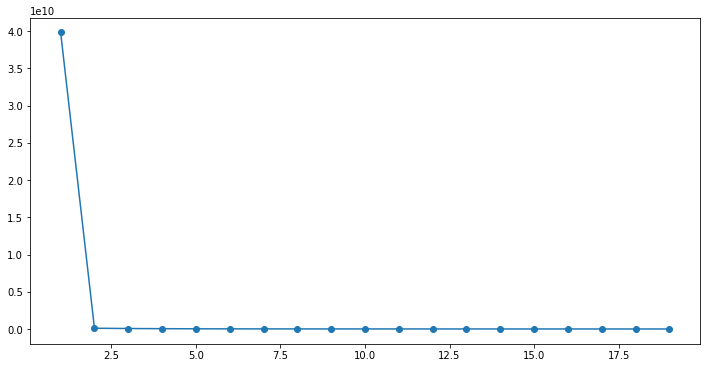

In [43]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_error,marker='o')

In [44]:
kmeans=KMeans(n_clusters=2).fit(liv)
centroids=kmeans.cluster_centers_
print('centroids: \n',centroids)
label=kmeans.labels_
print()
print('Labels: ',label)

centroids: 
 [[ 4.47823834e+01  3.31537133e+00  1.49412781e+00  2.91366149e+02
   8.11260794e+01  1.10414508e+02  6.48169257e+00  3.13851468e+00
   9.47063903e-01  7.58203800e-01]
 [ 3.95000000e+01  9.00000000e-01  3.25000000e-01  1.76250000e+02
   2.10000000e+01  3.70000000e+01  6.70000000e+00  3.62500000e+00
  -1.00000000e+05  5.00000000e-01]]

Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0

In [45]:
cm = confusion_matrix(y,label)
cm

array([[  0,   0,   0],
       [414,   2,   0],
       [165,   2,   0]], dtype=int64)

In [46]:
print('Accuracy Score:',metrics.accuracy_score(y, label))
print(classification_report(y, label))

Accuracy Score: 0.003430531732418525
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.50      0.00      0.01       416
         2.0       0.00      0.00      0.00       167

    accuracy                           0.00       583
   macro avg       0.17      0.00      0.00       583
weighted avg       0.36      0.00      0.01       583



In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")

highlabel=cluster.fit_predict(liv)

In [58]:
y=highlabel
x=liver.drop(["class"],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [59]:
# 1. Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
logistic=lr.score(x_test,pred)
print("score",logistic)
print("Accuray ", metrics.accuracy_score(y_test,pred))
print("Confusion matrix\n",confusion_matrix(y_test,pred))

score 1.0
Accuray  1.0
Confusion matrix
 [[173   0]
 [  0   2]]


In [60]:
# 2 #Fitting decision tree classification to the training set
from sklearn.tree import DecisionTreeClassifier
classifier3=DecisionTreeClassifier(criterion= "entropy")
classifier3.fit(x_train,y_train)
y2_pred=classifier3.predict(x_test)
entropy_tree=classifier3.score(x_test,y2_pred)
print("score",entropy_tree)
print("Accuray ", metrics.accuracy_score(y_test,y2_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y2_pred))

score 1.0
Accuray  1.0
Confusion matrix
 [[173   0]
 [  0   2]]


In [61]:
# 3. Decision tree using gini
from sklearn import tree
classifier5=DecisionTreeClassifier(criterion= "gini")
classifier5.fit(x_train,y_train)
y3_pred=classifier5.predict(x_test)
gini=classifier5.score(x_test,y3_pred)
print("score",gini)
print("Accuray ", metrics.accuracy_score(y_test,y3_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y3_pred))

score 1.0
Accuray  1.0
Confusion matrix
 [[173   0]
 [  0   2]]


In [62]:
#4 Random forest

from sklearn.ensemble import RandomForestClassifier
#create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(x_train,y_train)
#predict the model
y4_pred=clf2.predict(x_test)
clf2.fit(x_train,y_train)
clf2.predict(x_test)
print("score",clf2.score(x_test,y4_pred))
print("Accuray ", metrics.accuracy_score(y_test,y4_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y4_pred))

score 1.0
Accuray  0.9885714285714285
Confusion matrix
 [[173   0]
 [  2   0]]


In [63]:
#5 Naive Bayes
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y8_pred=model.predict(x_test)
print("score",model.score(x_test,y8_pred))
print("Accuray ", metrics.accuracy_score(y_test,y8_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y8_pred))

score 1.0
Accuray  1.0
Confusion matrix
 [[173   0]
 [  0   2]]


In [84]:
#6 KNeighbors

from sklearn.neighbors import KNeighborsClassifier

classifier4=KNeighborsClassifier(n_neighbors=5)
classifier4.fit(x_train,y_train)
y6_pred=classifier4.predict(x_test)
print("score",classifier4.score(x_test,y6_pred))
print("Accuray ", metrics.accuracy_score(y_test,y6_pred))
print("Confusion matrix:\n", confusion_matrix(y_test,y6_pred))

score 1.0
Accuray  0.7085714285714285
Confusion matrix:
 [[115  14]
 [ 37   9]]


## AgglomerativeClustering

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [93.75, 93.75, 132.5, 132.5],
  [70.0, 70.0, 113.125, 113.125],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [195.0, 195.0, 205.0, 205.0],
  [172.5, 172.5, 200.0, 200.0],
  [155.0, 155.0, 186.25, 186.25],
  [215.0, 215.0, 225.0, 225.0],
  [170.625, 170.625, 220.0, 220.0],
  [91.5625, 91.5625, 195.3125, 195.3125],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [345.0, 345.0, 355.0, 355.0],
  [365.0, 365.0, 375.0, 375.0],
  [350.0, 350.0, 370.0, 370.0],
  [322

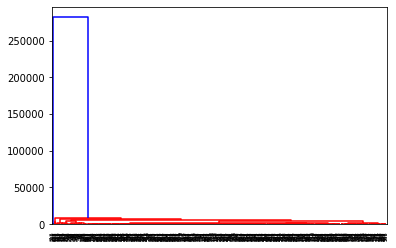

In [66]:
c= linkage(liv,"ward")
dendrogram(c, labels=liv.index)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [75.0, 75.0, 85.0, 85.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [155.0, 155.0, 173.75, 173.75],
  [145.0, 145.0, 164.375, 164.375],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [295.0, 295.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [375.0, 375.0, 385.0, 385.0],
  [395.0, 395.0, 405.0, 405.0],
  [435.0, 435.0, 445.0, 445.0],
  [425.0, 425.0, 440.0, 440.0],
  [485.0, 485.0, 495.0, 495.0],
  [505.0, 505.0, 515.0, 515.0],
  [535.0, 535.0, 545.0, 545.0],
  [525.0, 525.0, 540.0, 540.0],
  [565.0, 565.0, 575.0, 575.0],
  [555.0, 555.0, 570.0, 570.0],
  [532.5, 532.5, 562.5, 562.5],
  [585.0, 

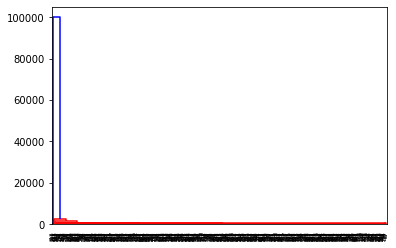

In [69]:
c= linkage(liv,"single")
dendrogram(c, labels=liv.index)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [70.0, 70.0, 92.5, 92.5],
  [55.0, 55.0, 81.25, 81.25],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [170.0, 170.0, 192.5, 192.5],
  [155.0, 155.0, 181.25, 181.25],
  [132.5, 132.5, 168.125, 168.125],
  [115.0, 115.0, 150.3125, 150.3125],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [290.0, 290.0, 312.5, 312.5],
  [262.5, 262.5, 301.25, 301.25],
  [223.75, 223.75, 281.875, 281.875],
  [345.0, 345.0, 355.0, 355.0],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 380.0, 380.0],
  [350

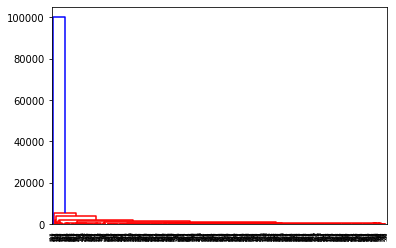

In [70]:
c= linkage(liv,"complete")
dendrogram(c, labels=liv.index)

In [71]:
cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
cluster.fit_predict(liv)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
y=cluster.fit_predict(liv)
x=liv
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [73]:
# 1. Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
logistic=lr.score(x_test,pred)
print("score",logistic)
print("Accuray ", metrics.accuracy_score(y_test,pred))
print("Confusion matrix\n",confusion_matrix(y_test,pred))

score 1.0
Accuray  1.0
Confusion matrix
 [[172   0]
 [  0   3]]


In [74]:
# 2 #Fitting decision tree classification to the training set
from sklearn.tree import DecisionTreeClassifier
classifier3=DecisionTreeClassifier(criterion= "entropy")
classifier3.fit(x_train,y_train)
y2_pred=classifier3.predict(x_test)
entropy_tree=classifier3.score(x_test,y2_pred)
print("score",entropy_tree)
print("Accuray ", metrics.accuracy_score(y_test,y2_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y2_pred))

score 1.0
Accuray  1.0
Confusion matrix
 [[172   0]
 [  0   3]]


In [75]:
# 3. Decision tree using gini
from sklearn import tree
classifier5=DecisionTreeClassifier(criterion= "gini")
classifier5.fit(x_train,y_train)
y3_pred=classifier5.predict(x_test)
gini=classifier5.score(x_test,y3_pred)
print("score",gini)
print("Accuray ", metrics.accuracy_score(y_test,y3_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y3_pred))

score 1.0
Accuray  1.0
Confusion matrix
 [[172   0]
 [  0   3]]


In [76]:
#4 Random forest

from sklearn.ensemble import RandomForestClassifier
#create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(x_train,y_train)
#predict the model
y4_pred=clf2.predict(x_test)
clf2.fit(x_train,y_train)
clf2.predict(x_test)
print("score",clf2.score(x_test,y4_pred))
print("Accuray ", metrics.accuracy_score(y_test,y4_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y4_pred))

score 1.0
Accuray  0.9828571428571429
Confusion matrix
 [[172   0]
 [  3   0]]


In [77]:
#5 Naive Bayes
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y8_pred=model.predict(x_test)
print("score",model.score(x_test,y8_pred))
print("Accuray ", metrics.accuracy_score(y_test,y8_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y8_pred))

score 1.0
Accuray  1.0
Confusion matrix
 [[172   0]
 [  0   3]]


In [82]:
#6 KNeighbors

from sklearn.neighbors import KNeighborsClassifier

classifier4=KNeighborsClassifier(n_neighbors=5)
classifier4.fit(x_train,y_train)
y6_pred=classifier4.predict(x_test)
print("score",classifier4.score(x_test,y6_pred))
print("Accuray ", metrics.accuracy_score(y_test,y6_pred))
print("Confusion matrix:\n", confusion_matrix(y_test,y6_pred))

score 1.0
Accuray  0.7085714285714285
Confusion matrix:
 [[115  14]
 [ 37   9]]


## PCA Without scalar

In [79]:
y=liver["class"]
x=liver.drop(["class"],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,)

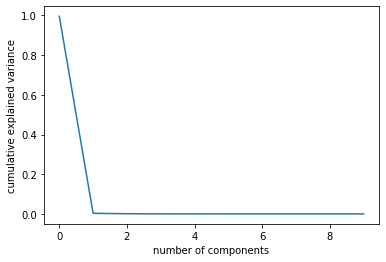

In [87]:
from sklearn.decomposition import PCA
pca=PCA()
x_train = pca.fit_transform(x_train)
x_test=pca.transform(x_test)
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()

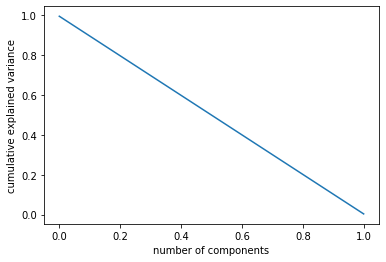

In [88]:
from sklearn.decomposition import PCA
pca=PCA(2)
x_train = pca.fit_transform(x_train)
x_test=pca.transform(x_test)
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()

In [89]:
# 1. Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
logistic=lr.score(x_test,pred)
print("score",logistic)
print("Accuray ", metrics.accuracy_score(y_test,pred))
print("Confusion matrix\n",confusion_matrix(y_test,pred))

score 1.0
Accuray  0.7371428571428571
Confusion matrix
 [[129   0]
 [ 46   0]]


In [90]:
# 2 #Fitting decision tree classification to the training set
from sklearn.tree import DecisionTreeClassifier
classifier3=DecisionTreeClassifier(criterion= "entropy")
classifier3.fit(x_train,y_train)
y2_pred=classifier3.predict(x_test)
entropy_tree=classifier3.score(x_test,y2_pred)
print("score",entropy_tree)
print("Accuray ", metrics.accuracy_score(y_test,y2_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y2_pred))

score 1.0
Accuray  0.7028571428571428
Confusion matrix
 [[101  28]
 [ 24  22]]


In [91]:
# 3. Decision tree using gini
from sklearn import tree
classifier5=DecisionTreeClassifier(criterion= "gini")
classifier5.fit(x_train,y_train)
y3_pred=classifier5.predict(x_test)
gini=classifier5.score(x_test,y3_pred)
print("score",gini)
print("Accuray ", metrics.accuracy_score(y_test,y3_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y3_pred))

score 1.0
Accuray  0.7028571428571428
Confusion matrix
 [[103  26]
 [ 26  20]]


In [92]:
#4 Random forest

from sklearn.ensemble import RandomForestClassifier
#create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(x_train,y_train)
#predict the model
y4_pred=clf2.predict(x_test)
clf2.fit(x_train,y_train)
clf2.predict(x_test)
print("score",clf2.score(x_test,y4_pred))
print("Accuray ", metrics.accuracy_score(y_test,y4_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y4_pred))

score 0.9371428571428572
Accuray  0.6914285714285714
Confusion matrix
 [[106  23]
 [ 31  15]]


In [93]:
#5 Naive Bayes
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y8_pred=model.predict(x_test)
print("score",model.score(x_test,y8_pred))
print("Accuray ", metrics.accuracy_score(y_test,y8_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y8_pred))

score 1.0
Accuray  0.5314285714285715
Confusion matrix
 [[48 81]
 [ 1 45]]


In [94]:
#6 KNeighbors

from sklearn.neighbors import KNeighborsClassifier

classifier4=KNeighborsClassifier(n_neighbors=5)
classifier4.fit(x_train,y_train)
y6_pred=classifier4.predict(x_test)
print("score",classifier4.score(x_test,y6_pred))
print("Accuray ", metrics.accuracy_score(y_test,y6_pred))
print("Confusion matrix:\n", confusion_matrix(y_test,y6_pred))

score 1.0
Accuray  0.68
Confusion matrix:
 [[109  20]
 [ 36  10]]


## PCA With scalar

In [96]:
x = liver.drop(['class'], axis=1)
y=liver['class']

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [100]:
from sklearn.decomposition import PCA

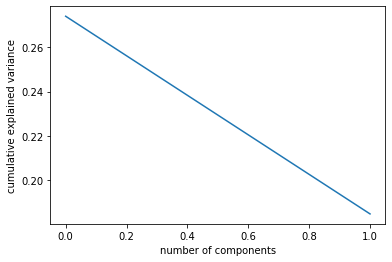

In [101]:
pca = PCA(2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()

In [102]:
# 1. Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
logistic=lr.score(x_test,pred)
print("score",logistic)
print("Accuray ", metrics.accuracy_score(y_test,pred))
print("Confusion matrix\n",confusion_matrix(y_test,pred))

score 1.0
Accuray  0.6495726495726496
Confusion matrix
 [[74  6]
 [35  2]]


In [103]:
# 2 #Fitting decision tree classification to the training set
from sklearn.tree import DecisionTreeClassifier
classifier3=DecisionTreeClassifier(criterion= "entropy")
classifier3.fit(x_train,y_train)
y2_pred=classifier3.predict(x_test)
entropy_tree=classifier3.score(x_test,y2_pred)
print("score",entropy_tree)
print("Accuray ", metrics.accuracy_score(y_test,y2_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y2_pred))

score 1.0
Accuray  0.6324786324786325
Confusion matrix
 [[58 22]
 [21 16]]


In [104]:
# 3. Decision tree using gini
from sklearn import tree
classifier5=DecisionTreeClassifier(criterion= "gini")
classifier5.fit(x_train,y_train)
y3_pred=classifier5.predict(x_test)
gini=classifier5.score(x_test,y3_pred)
print("score",gini)
print("Accuray ", metrics.accuracy_score(y_test,y3_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y3_pred))

score 1.0
Accuray  0.6324786324786325
Confusion matrix
 [[57 23]
 [20 17]]


In [105]:
#4 Random forest

from sklearn.ensemble import RandomForestClassifier
#create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(x_train,y_train)
#predict the model
y4_pred=clf2.predict(x_test)
clf2.fit(x_train,y_train)
clf2.predict(x_test)
print("score",clf2.score(x_test,y4_pred))
print("Accuray ", metrics.accuracy_score(y_test,y4_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y4_pred))

score 0.9572649572649573
Accuray  0.6153846153846154
Confusion matrix
 [[62 18]
 [27 10]]


In [106]:
#5 Naive Bayes
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y8_pred=model.predict(x_test)
print("score",model.score(x_test,y8_pred))
print("Accuray ", metrics.accuracy_score(y_test,y8_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y8_pred))

score 1.0
Accuray  0.5811965811965812
Confusion matrix
 [[46 34]
 [15 22]]


In [107]:
#6 KNeighbors

from sklearn.neighbors import KNeighborsClassifier

classifier4=KNeighborsClassifier(n_neighbors=5)
classifier4.fit(x_train,y_train)
y6_pred=classifier4.predict(x_test)
print("score",classifier4.score(x_test,y6_pred))
print("Accuray ", metrics.accuracy_score(y_test,y6_pred))
print("Confusion matrix:\n", confusion_matrix(y_test,y6_pred))

score 1.0
Accuray  0.6068376068376068
Confusion matrix:
 [[63 17]
 [29  8]]


In [ ]:
from sklearn.svm import SVC

y=liver["class"]
x=liver.drop(["class"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

model=SVC()

model.fit(x_train,y_train)
predict=model.predict(x_test)
accuracy_score(y_test,predict)